In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
#to make everything locally
cf.go_offline()

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts())

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPH

In [8]:
df.App.nunique()

9660

In [9]:
df.Rating.nunique()

40

In [10]:
df['Type'].fillna("Free", inplace = True)
df.dropna(subset = ['Content Rating'], inplace=True)

In [11]:
modeValueRating = df['Rating'].mode()

In [12]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [13]:
df['Reviews'] = df.Reviews.astype(int)
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

In [14]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [15]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
df['Size'] = df.Size.replace('Varies with device', np.NaN)
df['Size'] = pd.to_numeric(df['Size']) # Converting the string to Numeric type
df.dropna(subset = ['Size'], inplace=True)
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])

In [95]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
year_added        0
month_added       0
dtype: int64

In [17]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

In [18]:
# NaN values dropped 
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [19]:
df.shape

(9145, 13)

In [20]:
# inconsistent formatting fixed for Size, Installs and Price 
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [21]:
# Size, Reviews,Price and Installs have successfully converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int32  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 964.5+ KB


In [22]:
# Checking rating over 5
df.loc[df["Rating"] > 5].values

array([], shape=(0, 13), dtype=object)

In [23]:
# There are 7 records where Reviews are greater than Installs 
df[df['Reviews'] > df['Installs']].shape

(10, 13)

In [24]:
# Dropping 7 records that have greater Reviews than Installs
df.drop(df[df['Reviews'] > df['Installs']].index,inplace=True)
df[df['Reviews'] > df['Installs']].shape

(0, 13)

In [25]:
# There no apps where Price is > 0 and Type is "Free"
df[df['Price']>0][df['Type'] == 'Free'].shape

<ipython-input-25-ddc6fc77247b>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0, 13)

C:\Users\Uzi\.conda\lib\site-packages\seaborn\_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='Price'>

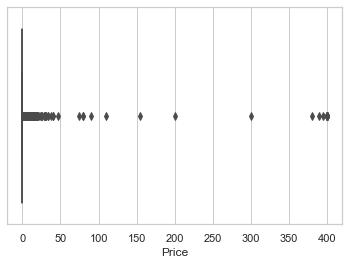

In [26]:
# Price variables seems to have outliers that needs to be addressed
sns.set(style="whitegrid")
sns.boxplot(x=df['Price'],data=df,orient='v')

In [27]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

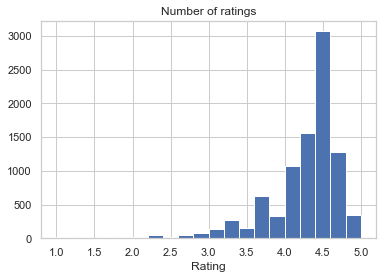

In [28]:
# Plotting histogram with number of ratings 

plt.hist(df["Rating"], bins = 20)
plt.title("Number of ratings")
plt.xlabel("Rating")
plt.show()

In [29]:
# Plotting the number of App and the average rating by category
apps = df['App'].value_counts()

cat = 'GAME' #take input from Dashboard & store in cat variable
df.loc[df['Category']==cat,['App']]

,App
1653,ROBLOX
1654,Subway Surfers
1655,Candy Crush Saga
1656,Solitaire
1657,Bubble Shooter
...,...
10791,Winter Wonderland
10792,Soccer Clubs Logo Quiz
10793,Sid Story
10803,Fatal Raid - No.1 Mobile FPS


### Show average of rating category wise

In [30]:
catAvgRat = df.loc[df['Category']==cat,['App','Category','Rating']]
catAvgRat['Rating'].mean()

4.27190900098913

In [31]:
df[df['Price'] > 200].shape

(17, 13)

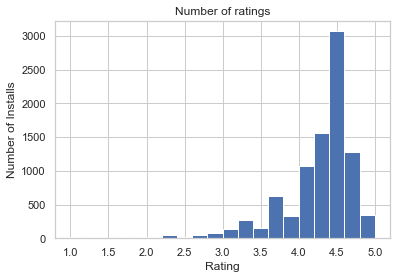

In [32]:
plt.hist(df["Rating"], bins = 20)
plt.title("Number of ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Installs")
plt.show()

In [33]:
# Dropping rows that have Price > 200
df.drop(df[df['Price'] > 200].index,inplace=True)

In [34]:
df[df['Price'] > 200].shape

(0, 13)

C:\Users\Uzi\.conda\lib\site-packages\seaborn\_core.py:1319: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='Reviews'>

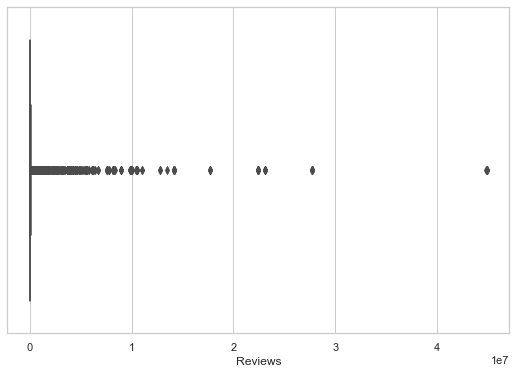

In [35]:
# Reviews seems to have outliers 
plt.figure(figsize=(9,6))
sns.boxplot(x='Reviews',data=df,orient='v')

In [36]:
# There are 9 Records that counts more than 2 millions
df[df['Reviews'] > 20**6].shape

(0, 13)

In [37]:
# Compared to 9 Reviews that counts for over 2 million there are 539 Installs that Counts for more than 2 millions
# This concludes that both Reviews and Installs have outliers 
df[df['Installs'] > 20**6].shape

(241, 13)

In [38]:
#dropping outliers of Reviews and Installs 
df.drop(df[df['Reviews'] > 20**6].index,inplace=True)
df.drop(df[df['Installs'] > 20**6].index,inplace=True)
df.shape

(8877, 13)

In [39]:
df[df['Reviews'] > 20**6].shape
df[df['Installs'] > 20**6].shape

(0, 13)

C:\Users\Uzi\.conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



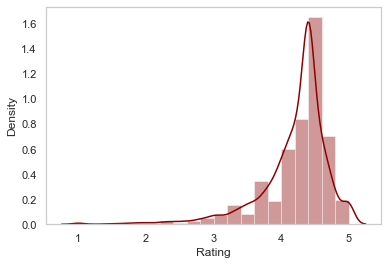

In [40]:
# Having a look at distribution of Rating where most ratings are distributed above 4 
sns.distplot(df['Rating'],kde=True,color='darkred',bins=20).grid()

C:\Users\Uzi\.conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



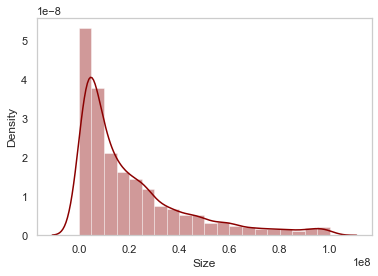

In [41]:
# Having a look at distribution of Size; few apps looks like oversized 1e8(0.0 to 0.05)
sns.distplot(df['Size'],kde=True,color='darkred',bins=20).grid()

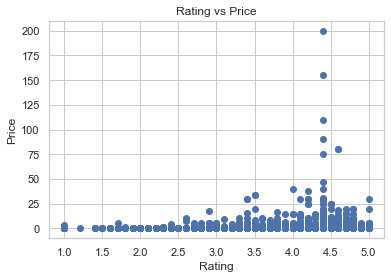

In [42]:
# number of Ratings are getting higher when the Price is getting lower which sudfest that people like to rate apps
# that are more affordable to them in terms of Price
plt.scatter(df['Rating'],df['Price'])
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

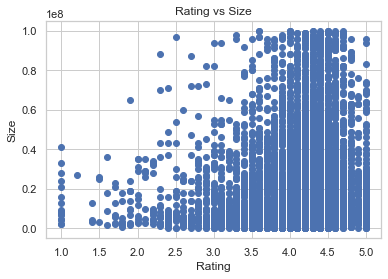

In [43]:
# Below plot clearly mentions that people like lighter apps where they rate lighter app more than heavier app
plt.scatter(df['Rating'],df['Size'])
plt.title('Rating vs Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

C:\Users\Uzi\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



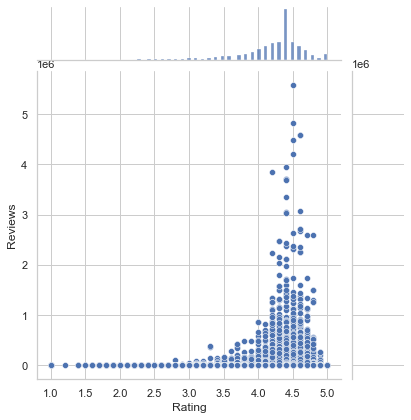

In [44]:
# Plot here clearly mentions that it is not always the case where more Reviews get more Ratings
sns.jointplot(df['Rating'],df['Reviews'])

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

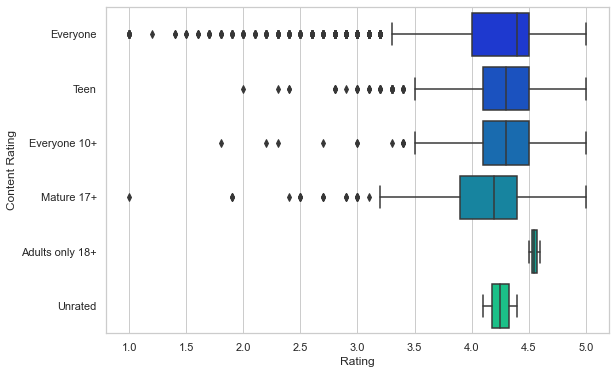

In [45]:
# below figure mentions that teens tend to rate more and most Ratings fall under 'Everyone'
plt.figure(figsize=(9,6))
sns.boxplot(x='Rating',y='Content Rating',data=df,palette='winter')

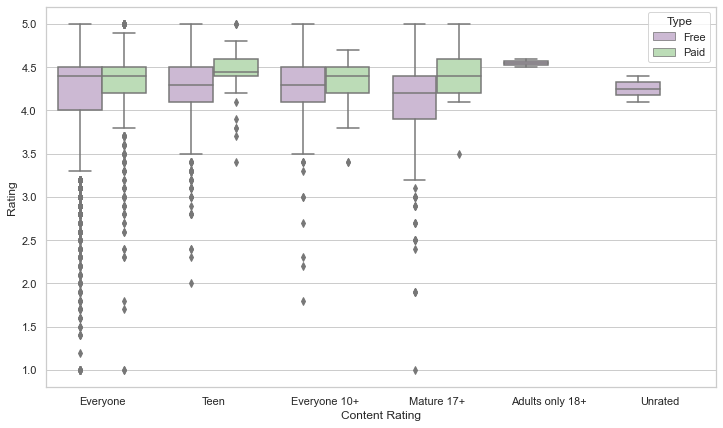

In [46]:
# people tend to vote higher when they pay for it.
# there is no paid applications for adults only (18+)
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=df, palette='PRGn')
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Category'>

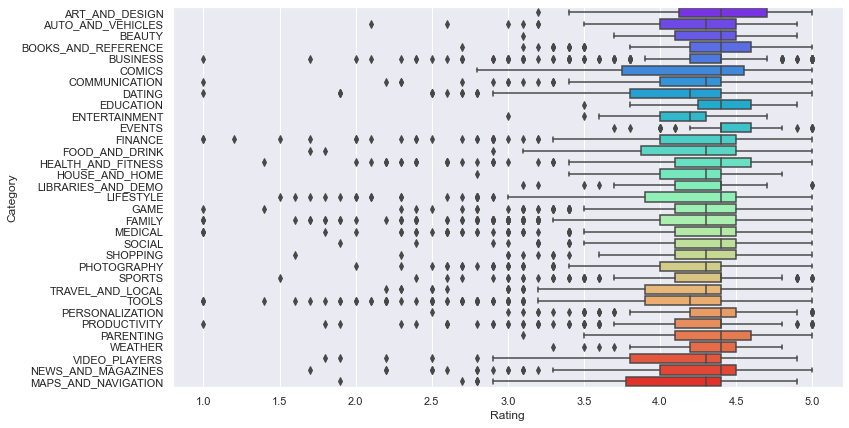

In [47]:
# every category does not differ much. Art and Design, entertainment and Parenting apps have the best rating  
sns.set(rc={'figure.figsize':(12,7)})
sns.boxplot(x="Rating", y="Category",data=df,palette='rainbow')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8877 non-null   object 
 1   Category        8877 non-null   object 
 2   Rating          8877 non-null   float64
 3   Reviews         8877 non-null   int32  
 4   Size            8877 non-null   float64
 5   Installs        8877 non-null   int64  
 6   Type            8877 non-null   object 
 7   Price           8877 non-null   float64
 8   Content Rating  8877 non-null   object 
 9   Genres          8877 non-null   object 
 10  Last Updated    8877 non-null   object 
 11  Current Ver     8869 non-null   object 
 12  Android Ver     8875 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 936.2+ KB


### categorical Columns analysis

In [49]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'object' and feature not in ['LastUpdated', 'Size','AndroidVersion']]
d = {}
for feature in categorical_feature:
    key = "total number of categories in " + feature
    d[key] = df[feature].nunique()
d

{'total number of categories in App': 8301,
 'total number of categories in Category': 33,
 'total number of categories in Type': 2,
 'total number of categories in Content Rating': 6,
 'total number of categories in Genres': 116,
 'total number of categories in Last Updated': 1358,
 'total number of categories in Current Ver': 2637,
 'total number of categories in Android Ver': 32}

In [50]:
df.Genres.value_counts()

Tools                      726
Entertainment              523
Education                  495
Medical                    433
Business                   397
                          ... 
Entertainment;Education      1
Card;Brain Games             1
Lifestyle;Pretend Play       1
Comics;Creativity            1
Strategy;Creativity          1
Name: Genres, Length: 116, dtype: int64

### Which category has  highest number of installations 

In [51]:
x_val = df['Installs'].groupby(by = df['Category']).sum().sort_values(ascending =False)

In [52]:
px.bar(df, x = x_val.index, y = x_val, color = x_val.index) 

### Which Category has maximum average rating

In [53]:
x_rat_cat = df['Rating'].groupby(by = df['Category']).mean().sort_values(ascending =False)
px.bar(df, x=x_rat_cat.index, y = x_rat_cat.values, color = x_rat_cat)

In [54]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps

In [55]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']]

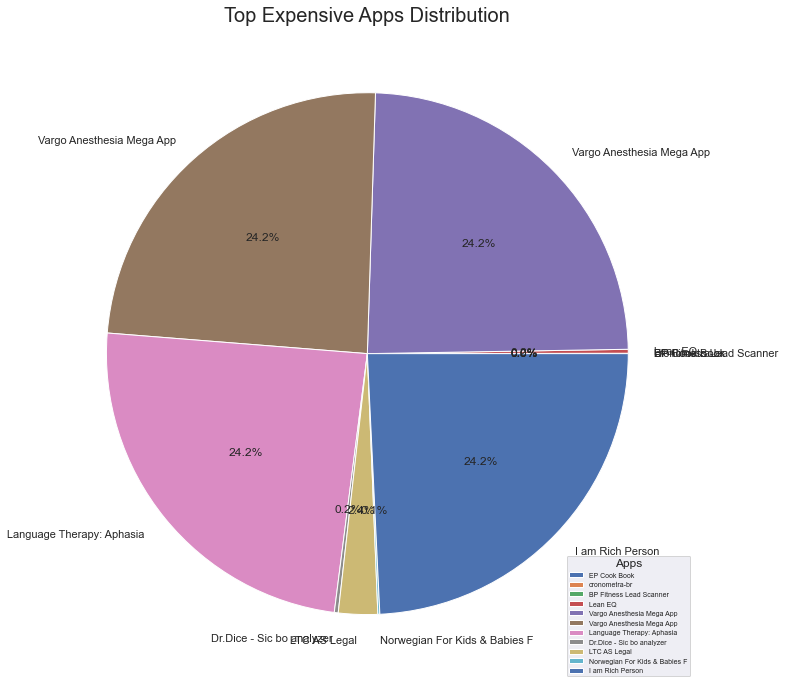

In [56]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

In [57]:
px.bar(df, x  = x_val.head(10).index, y = x_rat_cat[x_val.head(10).index], color = x_val.head(10).index)

### Which Category has maximum number of reviews submitted on GPS

In [58]:
# there are some negative signs before('-') we will remove them 
def positive(column):
    for i in column:
        if i>0:
            return i
        else:
            return i*(-1)
df['Reviews'] = df[['Reviews']].apply(positive,axis=1)

In [59]:
x_cat_rev = df['Reviews'].groupby(by = df['Category']).sum().sort_values(ascending =False)
px.bar(df, x = x_cat_rev.index, y = x_cat_rev.values, color = x_cat_rev.index)

### Which of the highest Installed category has highest ratings submitted?

In [60]:
px.bar(df, x = x_cat_rev[x_val.head(10).index].index, y = x_cat_rev[x_val.head(10).index].values, color = x_cat_rev[x_val.head(10).index].index)

### Which categories are of Type paid?

In [61]:
paid_data = df[df.Type=='Paid']
px.bar(paid_data,x = paid_data['Category'].value_counts().index, y = paid_data['Category'].value_counts().values, color = paid_data['Category'].value_counts().index)

### which are the categories with highest number of paid installations?

In [62]:
paid_cat_install = paid_data['Installs'].groupby(by = paid_data['Category']).sum().sort_values(ascending =False)
px.bar(paid_data, x = paid_cat_install.index, y = paid_cat_install.values , color =paid_cat_install)

### Which category with paid apps has highest ratings?

In [63]:
px.bar(paid_data, x = paid_data['Rating'].groupby(by = paid_data['Category']).mean().sort_values().dropna().index, 
       y = paid_data['Rating'].groupby(by = paid_data['Category']).mean().sort_values().dropna().values,
       color = paid_data['Rating'].groupby(by = paid_data['Category']).mean().sort_values().dropna().index)

###  Which category has highest number of Reviews submitted for paid apps?

In [64]:
paid_rev_cat = paid_data['Reviews'].groupby(by = paid_data['Category']).sum().sort_values(ascending = False)
px.bar(paid_data, x = paid_rev_cat.index, y = paid_rev_cat.values, color = paid_rev_cat.index, text = paid_cat_install)

### Which ContentRating has highest number of Installations?

In [65]:
install_cr = df['Installs'].groupby(by = df['Content Rating']).count().sort_values(ascending =False)

px.bar(df, x = install_cr.index, y = install_cr.values, color = install_cr.index)

In [66]:
data_fixedSize = df[df['Size']!='Varies with device']
data_fixedSize['Size'] = data_fixedSize['Size'].astype(float)
px.box(data_fixedSize, y = 'Size')

In [67]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

In [68]:
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df['year_added']=df['Last Updated'].dt.year
df['month_added']=df['Last Updated'].dt.month

In [69]:
d1=df[df['Type']=='Free']
d2=df[df['Type']=='Paid']

In [70]:
col='year_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"app udated or added over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [71]:
col='month_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [72]:
col='month_added'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid", marker=dict())
layout={'title':"Paid App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [73]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

No google is not bias beacuse they consider all of us proof!! --> see the above plot most of the app content rating rating are for everyone and most of them are Free.

In [74]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Content Rating ",'xaxis':{'title':"Contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [75]:
col='Content Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Content Rating",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [76]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [77]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Rating",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [78]:
col='Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Paid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

### Deep Analysis

In [79]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

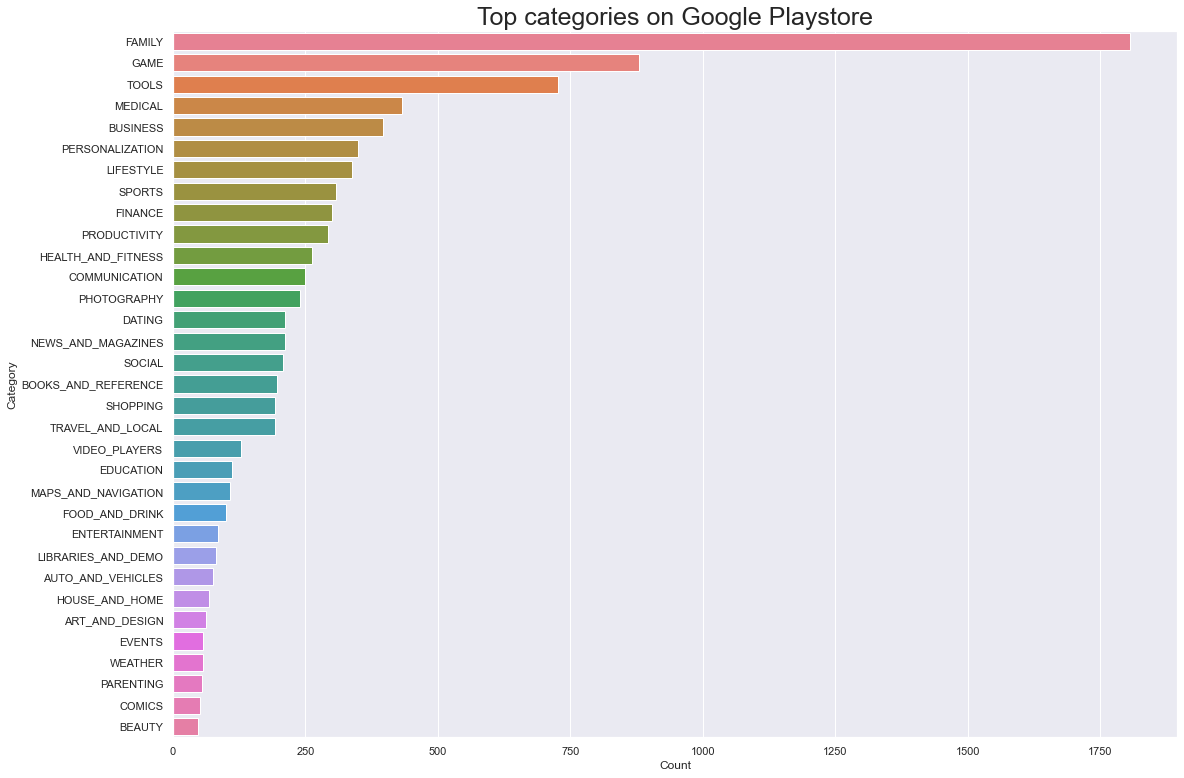

In [80]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

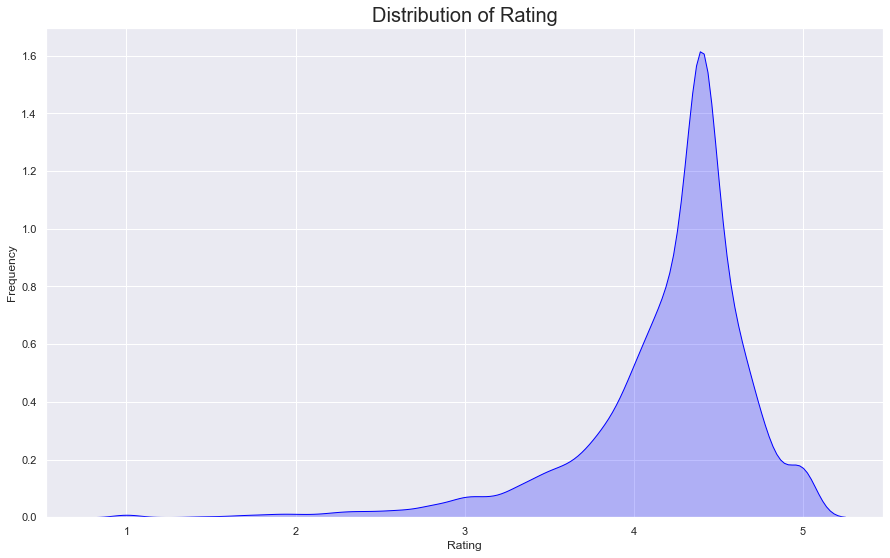

In [81]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

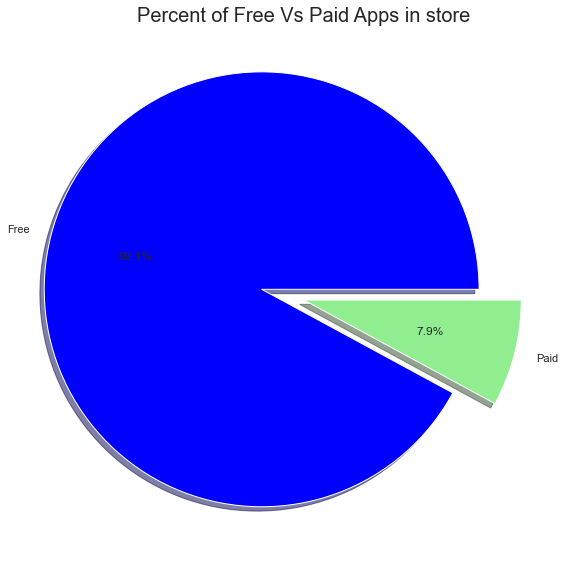

In [82]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

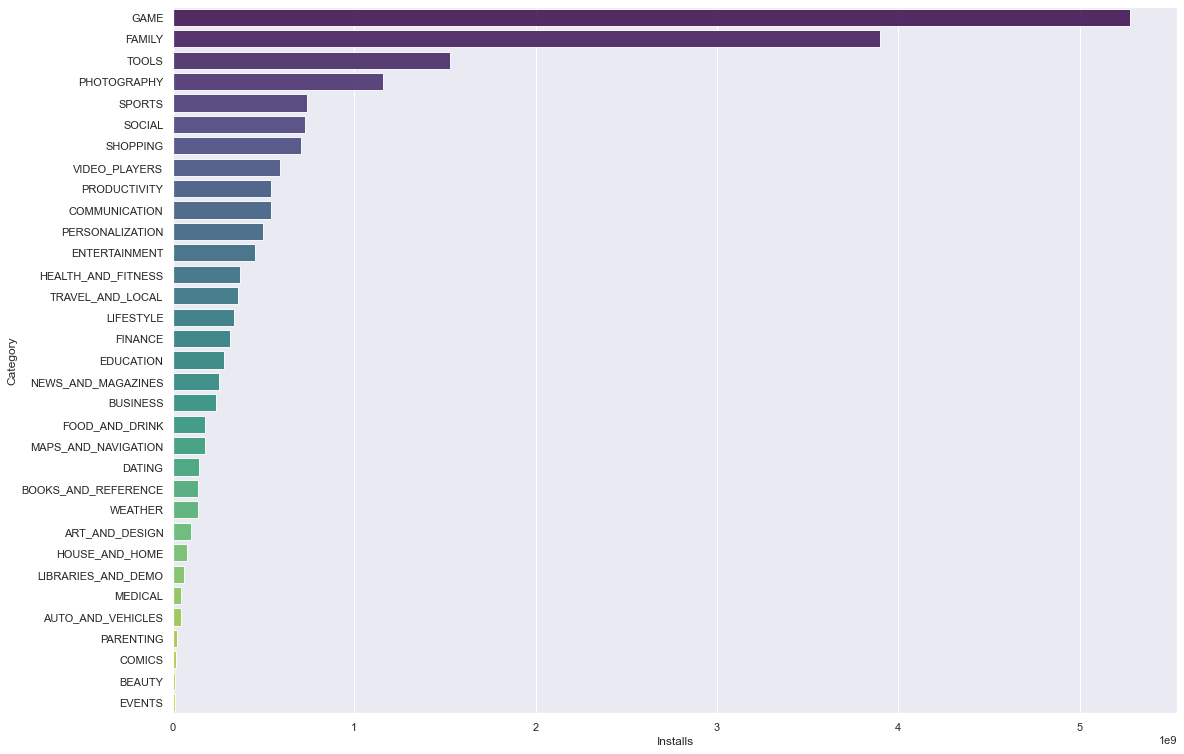

In [83]:
Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
x2sis = []
y2sis = []

for i in range(len(Installs_df)):
    x2sis.append(Installs_df .Installs[i])
    y2sis.append(Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")

In [84]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90);

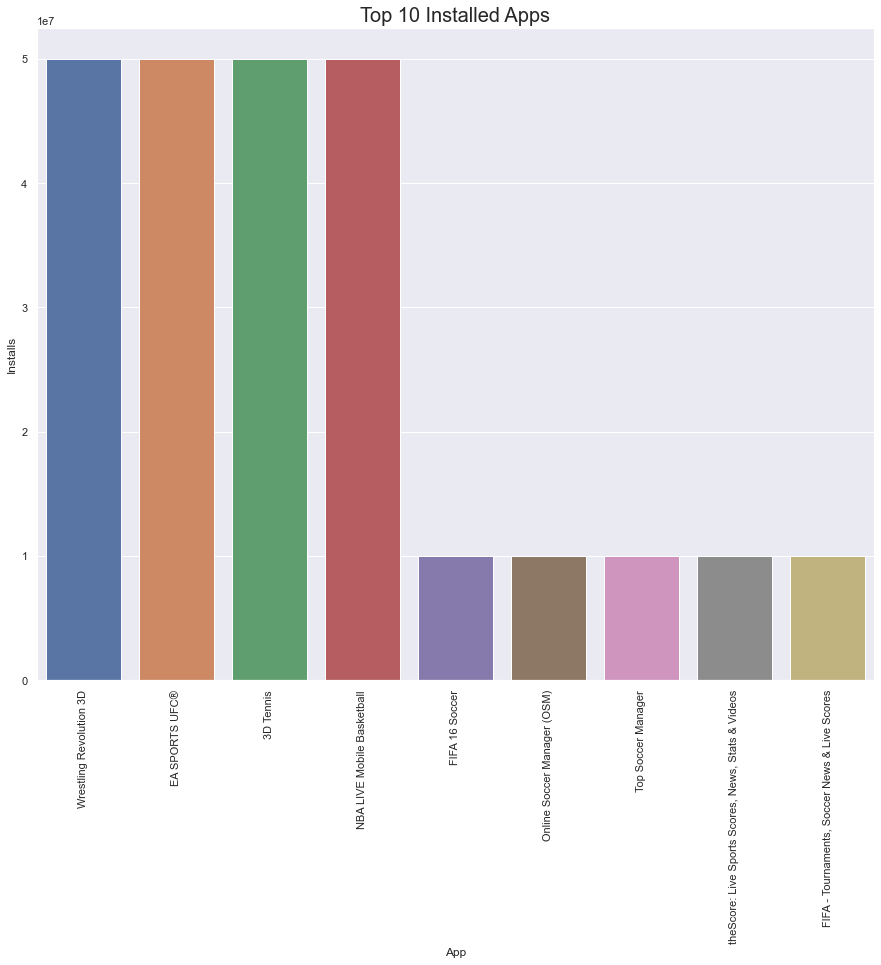

In [85]:
findtop10incategory('Sports')

In [86]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps

top10PaidApps_df = top10PaidApps[['App', 'Installs']]

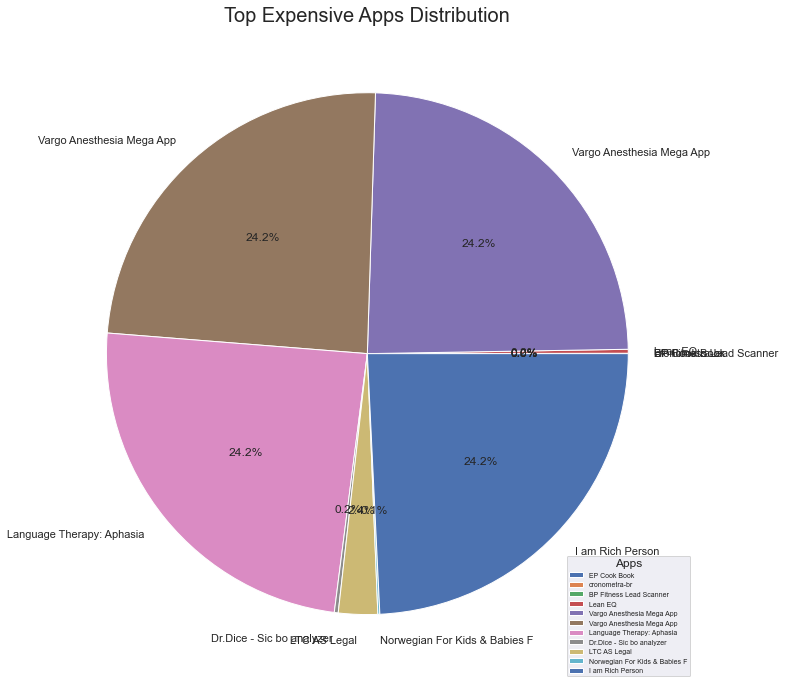

In [87]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

In [88]:
topAppsinGenres = df['Genres'].value_counts().head(50)
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):

  x3sis.append(topAppsinGenres.index[i])
  y3sis.append(topAppsinGenres[i])


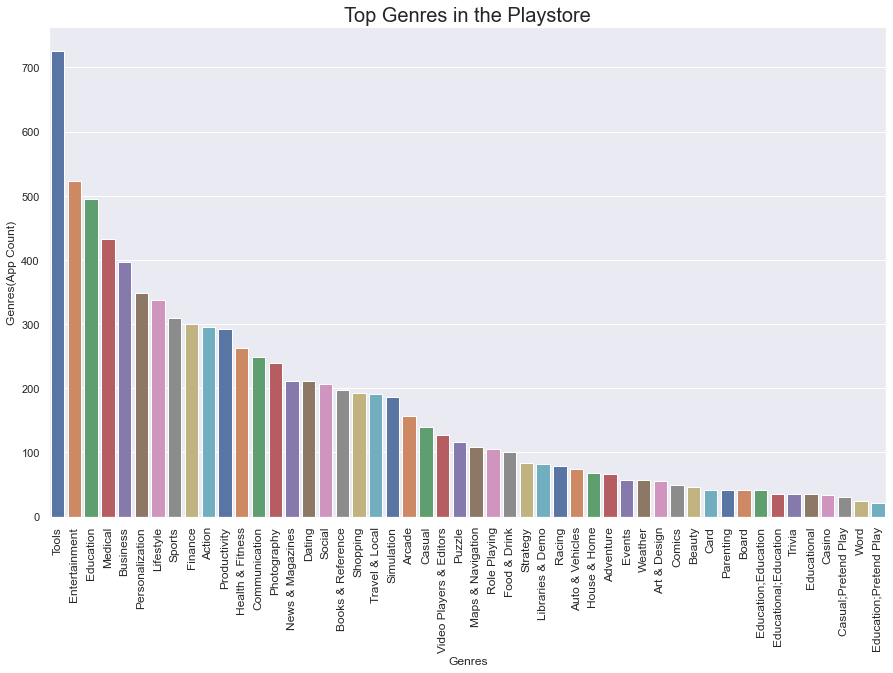

In [89]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

In [90]:
Paid_Apps_df = df[df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];

In [91]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)

In [92]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

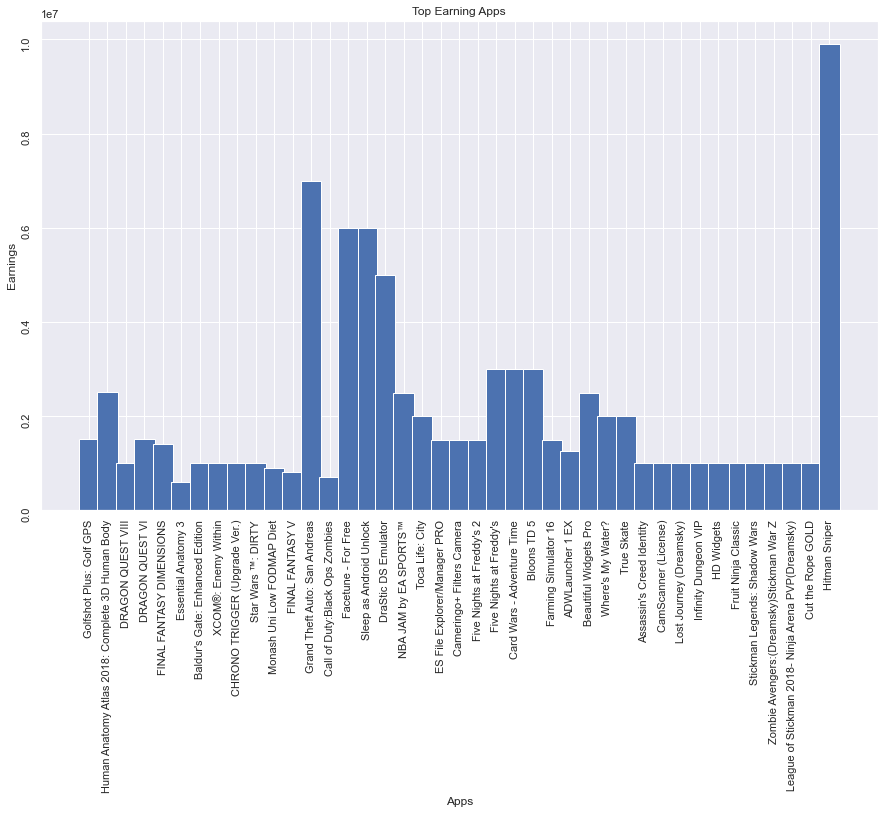

In [93]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

In [94]:
df.to_csv("GPSData.csv")